# News articles data analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

dataframe = pd.read_csv("data.tsv", sep = '\t', encoding = 'ANSI')

train, test = train_test_split(dataframe, test_size = 0.2, stratify = dataframe['category'])

## Wordclouds per category

In [7]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as stop_words
from wordcloud import WordCloud

""" Word 'said' seems to be the most common one in all of the wordclouds,
    so it is removed as it has no meaning. """
new_stop_words = list(stop_words)
new_stop_words.append('said')
new_stop_words.sort()

Define a word preprocessing function for the 'content' column.

In [8]:
def content_preproc(category, stopwords):
    business_articles = dataframe[dataframe['category'] == category]['content']
    string = ' '.join(business_articles).replace('\n','').replace('\r','').lower()
    words = string.split()
    words_filtered = [w for w in words if not w in stopwords] 
    words = ' '.join(words_filtered)
    return words

Generate the wordclouds.

In [9]:
business_wc = WordCloud(width=1920, background_color = 'white', height=1080).generate(content_preproc('business',new_stop_words))

entertainment_wc = WordCloud(width=1920, background_color = 'white', height=1080).generate(content_preproc('entertainment',new_stop_words))

politics_wc = WordCloud(width=1920, background_color = 'white', height=1080).generate(content_preproc('politics',new_stop_words))

sport_wc = WordCloud(width=1920, background_color = 'white', height=1080).generate(content_preproc('sport',new_stop_words))

tech_wc = WordCloud(width=1920, background_color = 'white', height=1080).generate(content_preproc('tech',new_stop_words))

### Business

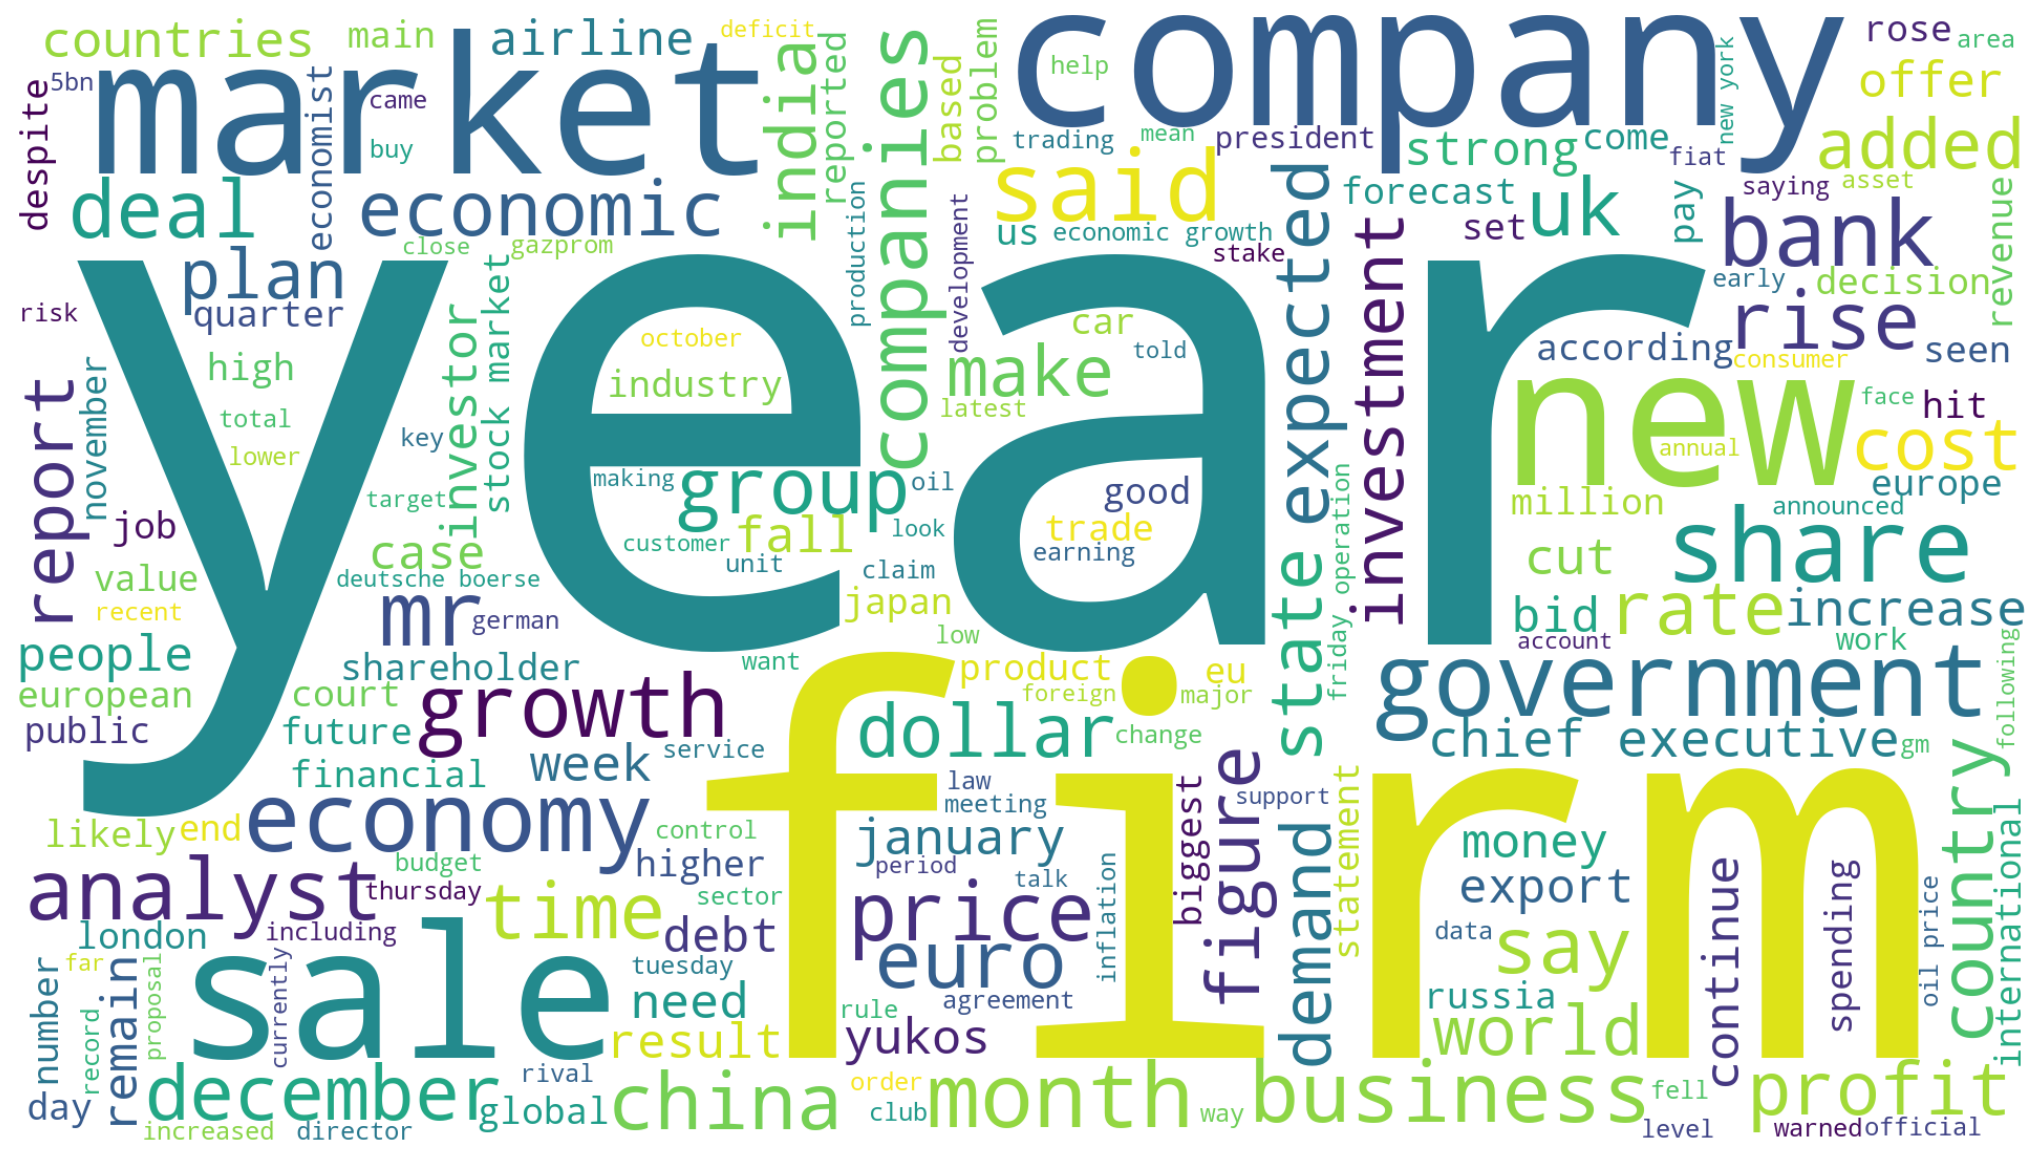

In [10]:
plt.figure(figsize=(20,10), dpi = 150)
plt.axis("off")
plt.imshow(business_wc, interpolation='bilinear')

### Entertainment

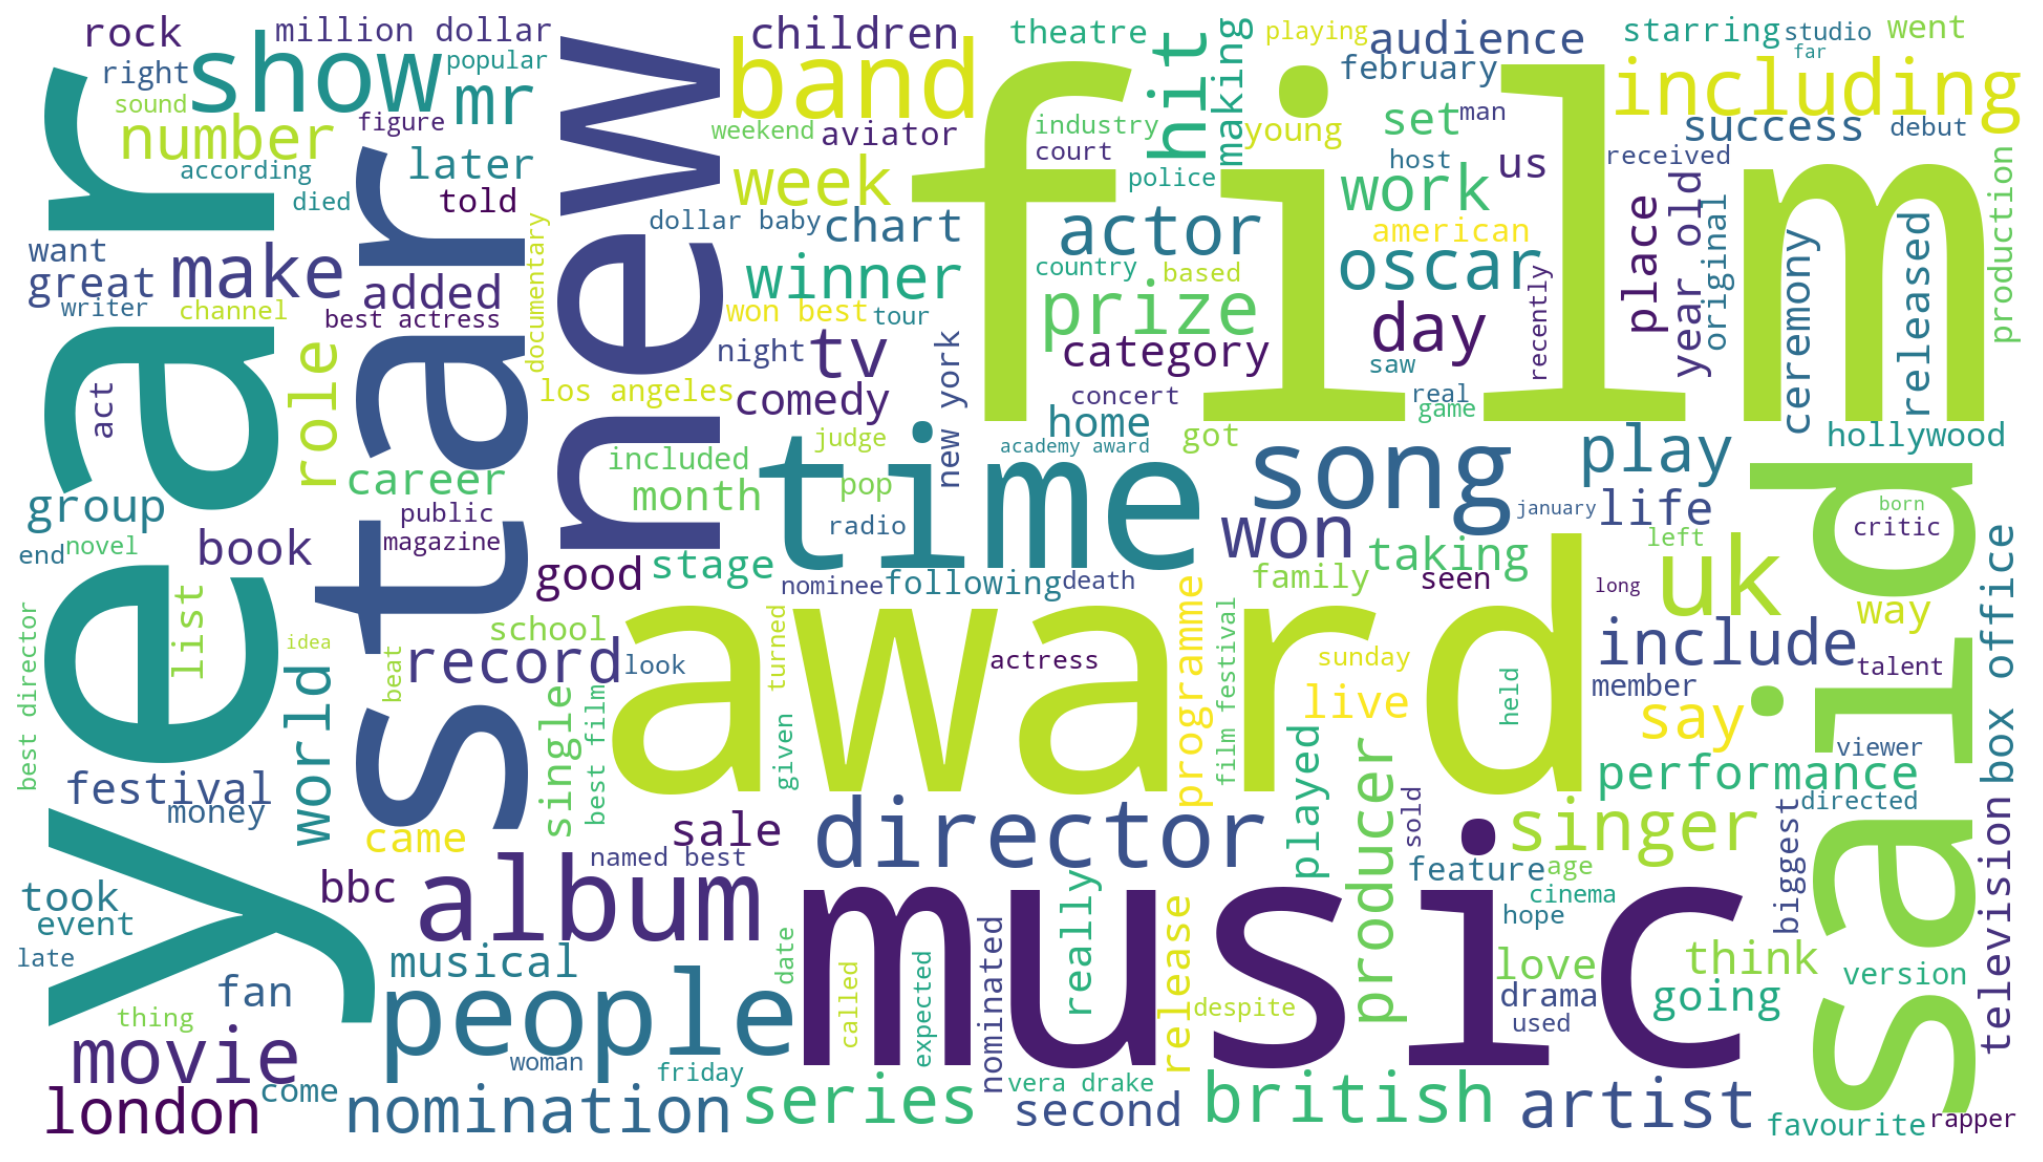

In [11]:
plt.figure(figsize=(20,10), dpi = 150)
plt.axis("off")
plt.imshow(entertainment_wc, interpolation='bilinear')

### Politics

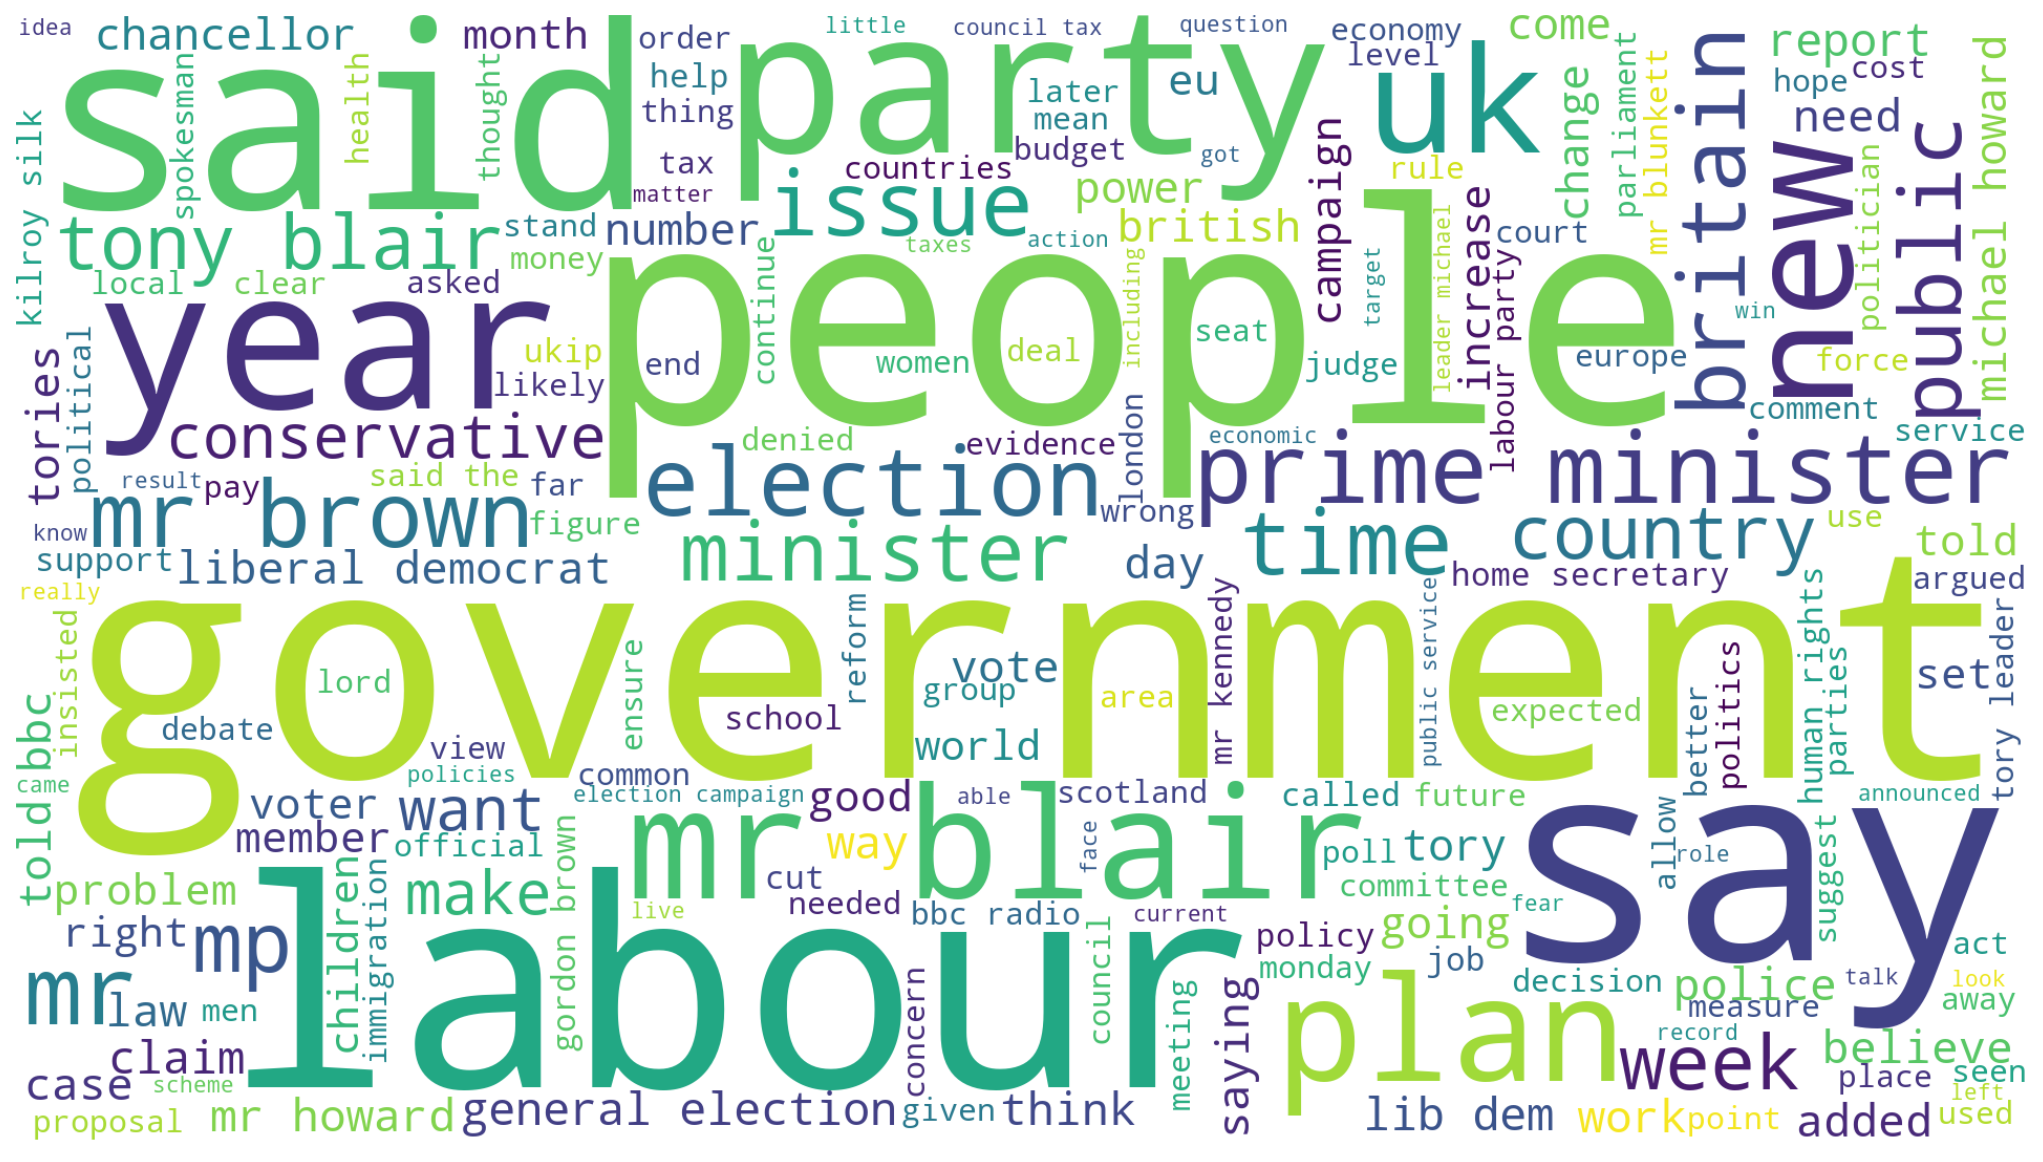

In [12]:
plt.figure(figsize=(20,10), dpi = 150)
plt.axis("off")
plt.imshow(politics_wc, interpolation='bilinear')

### Sport

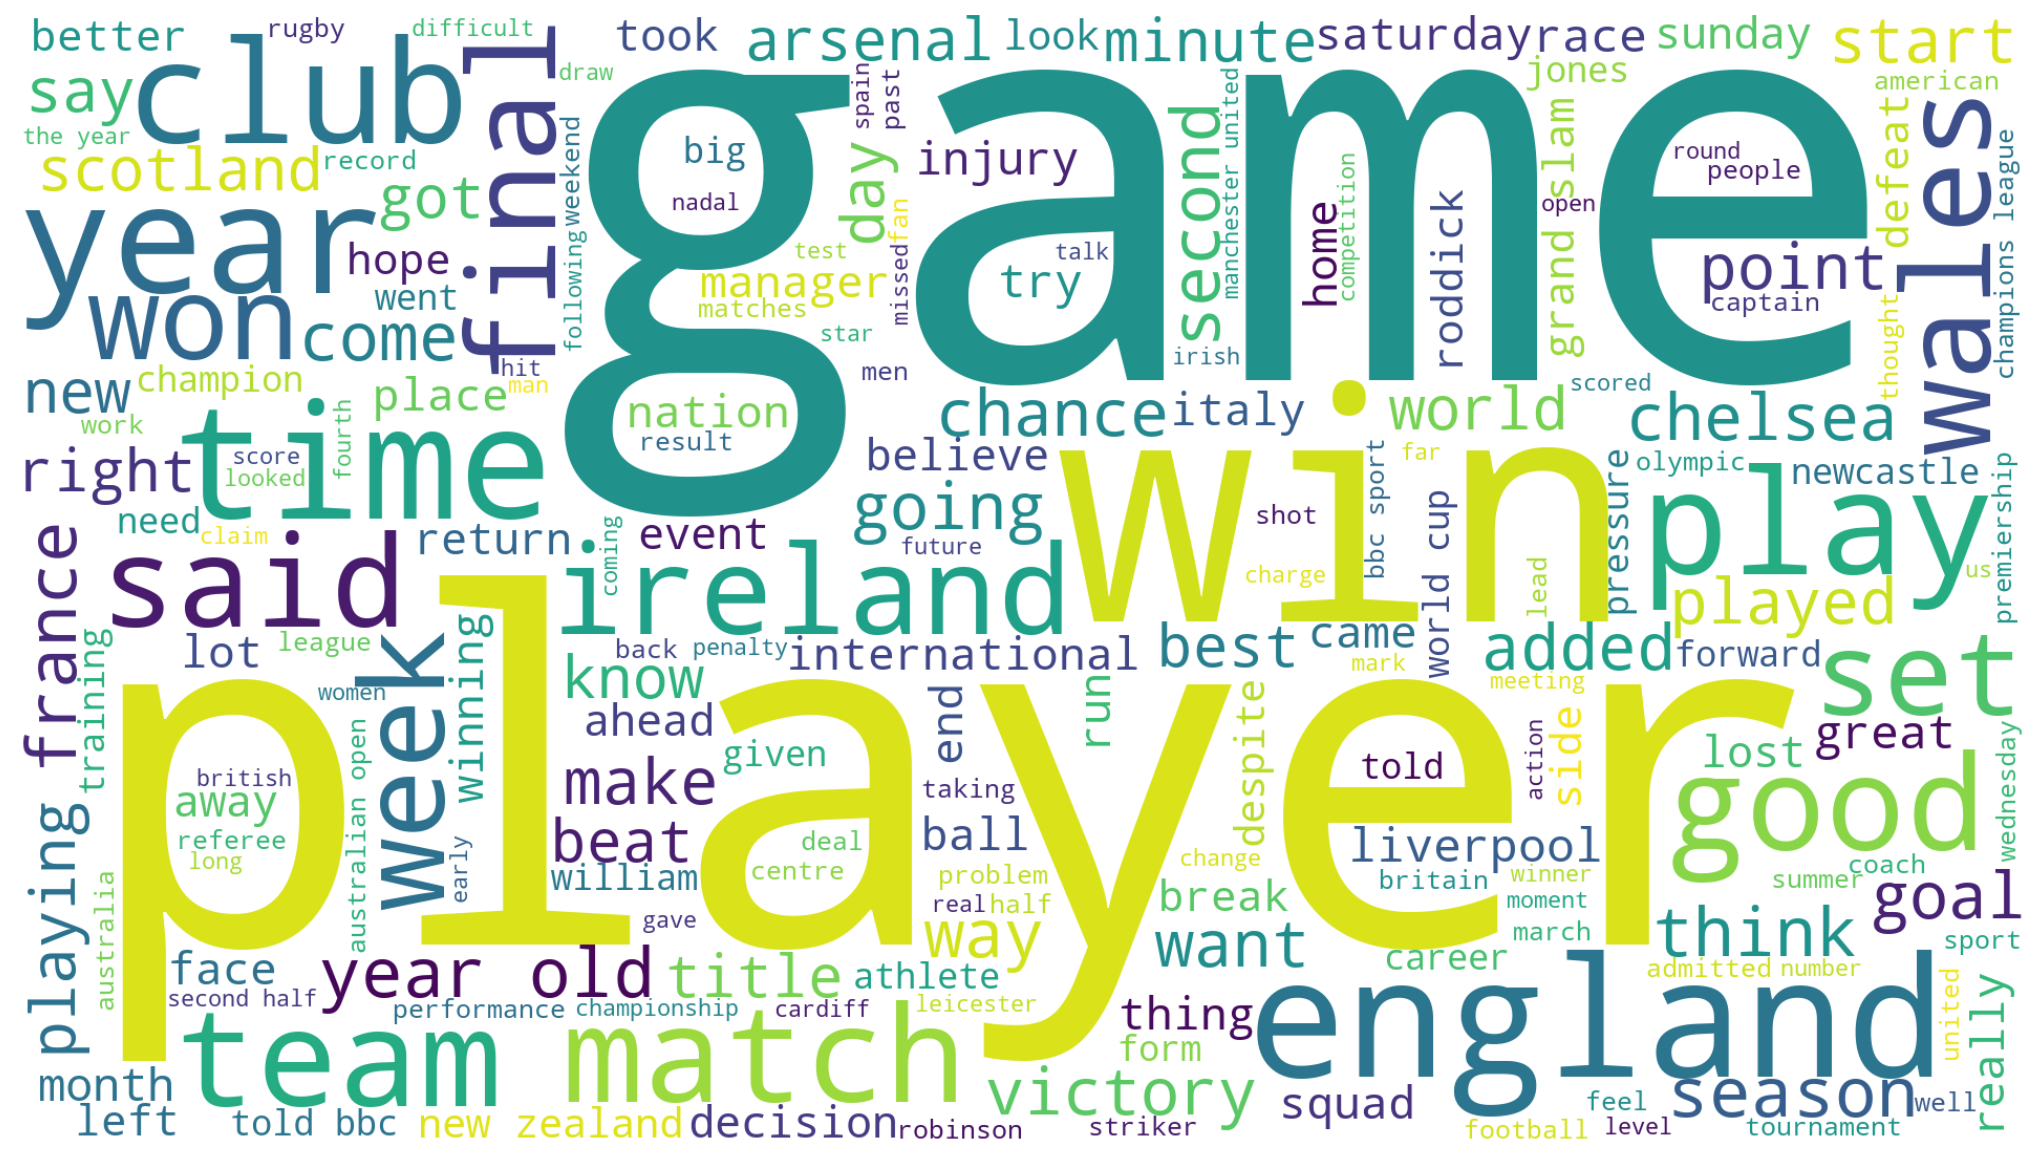

In [13]:
plt.figure(figsize=(20,10), dpi = 150)
plt.axis("off")
plt.imshow(sport_wc, interpolation='bilinear')

### Tech

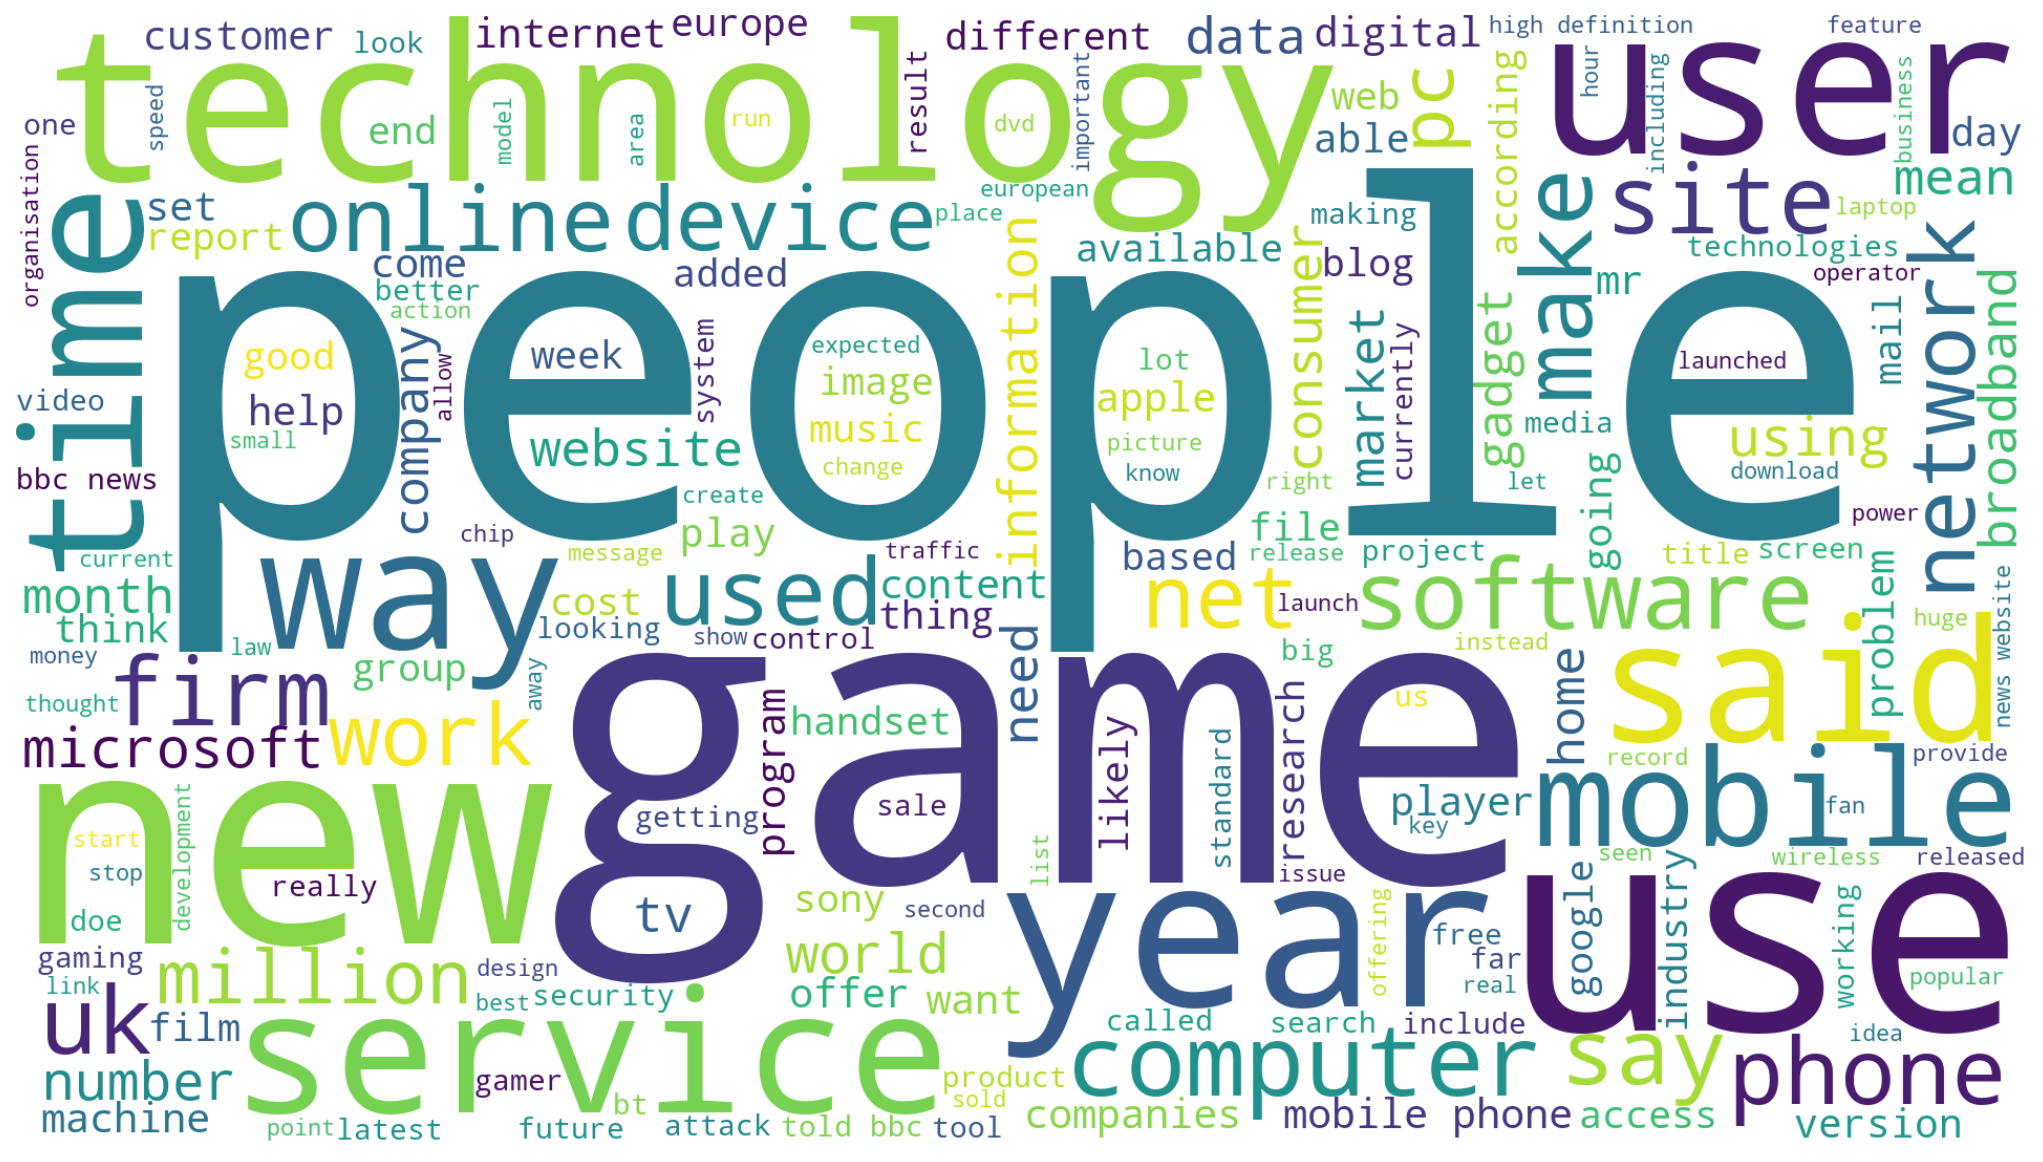

In [14]:
plt.figure(figsize=(20,10), dpi = 150)
plt.axis("off")
plt.imshow(tech_wc, interpolation='bilinear')

## Classification